<a href="https://colab.research.google.com/github/KOdunga/AIMLCourse/blob/main/NLP_Project_Ticket_Categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</center></font>
<center><font size=6>Introduction to Natural Language Processing - Week 4</center></font>


<center><font size=6><b>Customer Support Ticket Categorization</center></font>

## **Problem Statement**

### **Business Context**
In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to swiftly and effectively respond to customer input not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships. As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.

While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously. One of the most effective strategies at your disposal is to harness the power of Support Ticket Categorization.

### **Objective**
Develop an advanced support ticket categorization system that accurately classifies incoming tickets, assigns relevant tags based on their content, implements mechanisms and generate the first response based on the sentiment for prioritizing tickets for prompt resolution.



**Installing and Importing Necessary Libraries**

In [ ]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python --force-reinstall --upgrade --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 240.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 272.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 143.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 300.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nv

**We will run this incase we have no access to GPUs**

In [ ]:
# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used

#!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

In [3]:
# For downloading the models from HF Hub
!pip install huggingface_hub==0.20.3 -q

In [4]:
# Importing library for data manipulation
import pandas as pd

# Importing library for data visualization
import matplotlib.pyplot as plt

# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the json module
import json

# for time computations
import time

**Connect to Drive and Import the dataset**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#data = pd.read_csv("/content/drive/MyDrive/Support_ticket_text_data_mid_term.csv")

In [6]:
data = pd.read_csv("/content/Support_ticket_text_data_mid_term.csv")

## Data Overview

**Checking the first 5 rows of the data**

In [7]:
# checking the first five rows of the data
data.head()

,support_tick_id,support_ticket_text
0,ST2023-006,My internet connection has significantly slowe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...
2,ST2023-008,I've accidentally deleted essential work docum...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...
4,ST2023-010,"My smartphone battery is draining rapidly, eve..."


**Checking the shape of the data**

In [8]:
# checking the shape of the data
data.shape

(21, 2)

- The data has 21 rows and 2 columns.

**Checking for any missing vakues in the data**

In [9]:
# checking for missing values
data.isnull().sum()

support_tick_id        0
support_ticket_text    0
dtype: int64

- The data set has no missing values.

## Model Building

**Loading the model (Mistral)**

In [10]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [11]:
# Using hf_hub_download to download a model from the Hugging Face model hub
# The repo_id parameter specifies the model name or path in the Hugging Face repository
# The filename parameter specifies the name of the file to download
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [12]:
llm = Llama(
    model_path=model_path,
    n_ctx=1024,
)

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loade

**Define a utility function to parse JSON output from the model**

In [13]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_sentiment = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_sentiment)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

## **Task 1: Ticket Categorization and Returning Structured Output**

**Create a copy of the data to maintain the original**

In [14]:
# creating a copy of the data
data_1 = data.copy()

**Defining Model Response Parameters for Task 1**

In [15]:
#Defining the response funciton for Task 1.
def response_1(prompt,review):
    model_output = llm(
      f"""
      Q: {prompt}
      Review: {review}
      A:
      """,
      max_tokens=32,
      stop=["Q:", "\n"],
      temperature=0.01,
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]

    return temp_output

- **`max_tokens`**: This parameter **specifies the maximum number of tokens that the model should generate** in response to the prompt.

- **`temperature`**: This parameter **controls the randomness of the generated response**. A higher temperature value will result in a more random response, while a lower temperature value will result in a more predictable response.

- **`top_p`**: This parameter **controls the diversity of the generated response by establishing a cumulative probability cutoff for token selection**. A higher value of top_p will result in a more diverse response, while a lower value will result in a less diverse response.

- **`repeat_penalty`**: This parameter **controls the penalty for repeating tokens in the generated response**. A higher value of repeat_penalty will result in a lower probability of repeating tokens, while a lower value will result in a higher probability of repeating tokens.

- **`top_k`**: This parameter **controls the maximum number of most-likely next tokens to consider** when generating the response at each step.

- **`stop`**: This parameter is a **list of tokens that are used to dynamically stop response generation** whenever the tokens in the list are encountered.

- **`echo`**: This parameter **controls whether the input (prompt) to the model should be returned** in the model response.

- **`seed`**: This parameter **specifies a seed value that helps replicate results**.

**Define the prompt message for task 1**

In [16]:
#Defining the LLM Prompt message
prompt_1 = """
    You are an AI analyzing IT support tickets. Categorize the given ticket using one or more of the below mentioned categories only and not any other depending upon the content of the ticket:
    - Connectivity
    - Hardware
    - Data
    - Software

    Format the output as a JSON object with a single key-value pair as shown below:
    {"Category": "your_category_prediction"}
"""

**Running the prompt against the inputs**

In [17]:
#Running the model prediction
start = time.time()
data_1['model_response'] = data_1['support_ticket_text'].apply(lambda x: response_1(prompt_1, x))
end = time.time()


llama_print_timings:        load time =    2057.04 ms
llama_print_timings:      sample time =       5.22 ms /     8 runs   (    0.65 ms per token,  1531.98 tokens per second)
llama_print_timings: prompt eval time =    2056.70 ms /   157 tokens (   13.10 ms per token,    76.34 tokens per second)
llama_print_timings:        eval time =    5856.21 ms /     7 runs   (  836.60 ms per token,     1.20 tokens per second)
llama_print_timings:       total time =    7948.63 ms /   164 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =    2057.04 ms
llama_print_timings:      sample time =       4.44 ms /     8 runs   (    0.56 ms per token,  1800.18 tokens per second)
llama_print_timings: prompt eval time =    1438.74 ms /    51 tokens (   28.21 ms per token,    35.45 tokens per second)
llama_print_timings:        eval time =    5168.51 ms /     7 runs   (  738.36 ms per token,     1.35 tokens per second)
llama_print_timings:       total time =    6645.68 ms /    58 

In [18]:
#Check the time taken to run the model
print("Time taken ",(end-start))

Time taken  219.40888237953186


 **Check the first five rows of the data to confirm whether the new column has been added**

In [19]:
#code to check the first 21 rows of the data to confirm whether the new column has been added
data_1['model_response'].head(21)

0      {"Category": "Connectivity"}
1          {"Category": "Hardware"}
2              {"Category": "Data"}
3      {"Category": "Connectivity"}
4          {"Category": "Hardware"}
5              {"Category": "Data"}
6          {"Category": "Software"}
7          {"Category": "Hardware"}
8              {"Category": "Data"}
9          {"Category": "Hardware"}
10             {"Category": "Data"}
11         {"Category": "Hardware"}
12         {"Category": "Hardware"}
13             {"Category": "Data"}
14         {"Category": "Hardware"}
15     {"Category": "Connectivity"}
16     {"Category": "Connectivity"}
17             {"Category": "Data"}
18             {"Category": "Data"}
19     {"Category": "Connectivity"}
20         {"Category": "Software"}
Name: model_response, dtype: object

In [20]:
#Check a sample input ticket and its predicted category
i = 2
print(data_1.loc[i, 'support_ticket_text'])
print(data_1.loc[i, 'model_response'])

I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?
 {"Category": "Data"}


**Applying the utility function to the model response**

In [21]:
# applying the function to the model response
data_1['model_response_parsed'] = data_1['model_response'].apply(extract_json_data)
data_1['model_response_parsed'].head(21)

0     {'Category': 'Connectivity'}
1         {'Category': 'Hardware'}
2             {'Category': 'Data'}
3     {'Category': 'Connectivity'}
4         {'Category': 'Hardware'}
5             {'Category': 'Data'}
6         {'Category': 'Software'}
7         {'Category': 'Hardware'}
8             {'Category': 'Data'}
9         {'Category': 'Hardware'}
10            {'Category': 'Data'}
11        {'Category': 'Hardware'}
12        {'Category': 'Hardware'}
13            {'Category': 'Data'}
14        {'Category': 'Hardware'}
15    {'Category': 'Connectivity'}
16    {'Category': 'Connectivity'}
17            {'Category': 'Data'}
18            {'Category': 'Data'}
19    {'Category': 'Connectivity'}
20        {'Category': 'Software'}
Name: model_response_parsed, dtype: object

**Display value counts for each predicted category**

In [22]:
data_1['model_response_parsed'].value_counts()

model_response_parsed
{'Category': 'Hardware'}        7
{'Category': 'Data'}            7
{'Category': 'Connectivity'}    5
{'Category': 'Software'}        2
Name: count, dtype: int64

In [23]:
# Normalizing the model_response_parsed column
model_response_parsed_df_1 = pd.json_normalize(data_1['model_response_parsed'])
model_response_parsed_df_1.head(21)

,Category
0,Connectivity
1,Hardware
2,Data
3,Connectivity
4,Hardware
5,Data
6,Software
7,Hardware
8,Data
9,Hardware


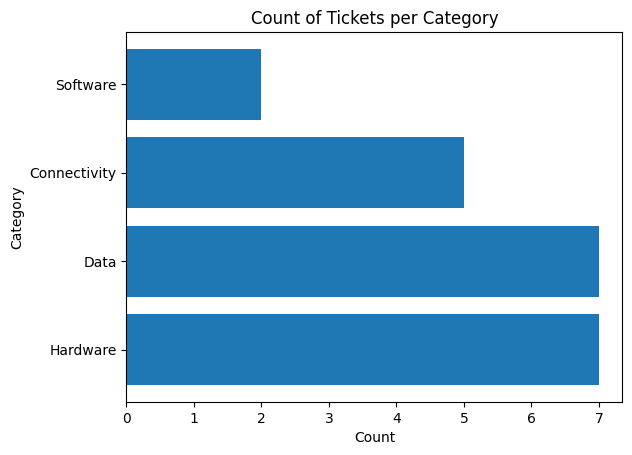

In [24]:
counts = model_response_parsed_df_1['Category'].apply(lambda x: str(x))
value_counts = counts.value_counts()
# Create a horizontal bar plot
plt.barh(value_counts.index,value_counts.values)
# Add labels and title
plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Count of Tickets per Category")
# Show the plot
plt.show()

- Most of the tickets are on hardwae and data related issues.

In [25]:
# Concatinating two dataframes
data_with_parsed_model_output_1 = pd.concat([data_1, model_response_parsed_df_1], axis=1)
data_with_parsed_model_output_1.head()

,support_tick_id,support_ticket_text,model_response,model_response_parsed,Category
0,ST2023-006,My internet connection has significantly slowe...,"{""Category"": ""Connectivity""}",{'Category': 'Connectivity'},Connectivity
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{""Category"": ""Hardware""}",{'Category': 'Hardware'},Hardware
2,ST2023-008,I've accidentally deleted essential work docum...,"{""Category"": ""Data""}",{'Category': 'Data'},Data
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{""Category"": ""Connectivity""}",{'Category': 'Connectivity'},Connectivity
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{""Category"": ""Hardware""}",{'Category': 'Hardware'},Hardware


In [26]:
# Dropping model_response and model_response_parsed columns
final_data_1 = data_with_parsed_model_output_1.drop(['model_response','model_response_parsed'], axis=1)
final_data_1.head()

,support_tick_id,support_ticket_text,Category
0,ST2023-006,My internet connection has significantly slowe...,Connectivity
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware
2,ST2023-008,I've accidentally deleted essential work docum...,Data
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Connectivity
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware


## **Task 2: Creating Tags**

**Create a copy of the data to maintain the original**

In [27]:
# creating a copy of the data
data_2 = data.copy()

**Defining Model Response Parameters for Task 2**

In [28]:
def response_2(prompt,ticket,category):
    model_output = llm(
      f"""
      Q: {prompt}
      Support ticket: {ticket}
      Category: {category}
      A:
      """,
      max_tokens=64, #set the maximum number of tokens the model should generate for this task.
      stop=["Q:", "\n"],
      temperature=0.01, #set the value for temperature.
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]
    final_output = temp_output[temp_output.index('{'):]

    return final_output

**Define the prompt message for task 2**

In [29]:
prompt_2 = """
   You are an AI analyzing IT support tickets. Tag the given support tickets using one or more of the below mentioned tags only depending upon the content of the ticket:
    - Internet
    - Wi-Fi
    - Laptop
    - Data
    - Smartphone
    - Drive
    - Computer
    - Hardware
    - Files
    - Software
    - Connectivity

    Format the output as a JSON object with a single comma separated key-value pair as shown below:
    {"Tags": "tag1, tag2, tag3"}

    Only return the JSON, do NOT return any other text or information.
"""

**Running the prompt against the inputs**

In [30]:
start = time.time()
data_2["model_response"]=final_data_1[['support_ticket_text','Category']].apply(lambda x: response_2(prompt_2, x[0],x[1]),axis =1)
end = time.time()

Llama.generate: prefix-match hit

llama_print_timings:        load time =    2057.04 ms
llama_print_timings:      sample time =       6.18 ms /    11 runs   (    0.56 ms per token,  1779.65 tokens per second)
llama_print_timings: prompt eval time =    1846.13 ms /   206 tokens (    8.96 ms per token,   111.58 tokens per second)
llama_print_timings:        eval time =    7491.31 ms /    10 runs   (  749.13 ms per token,     1.33 tokens per second)
llama_print_timings:       total time =    9381.23 ms /   216 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =    2057.04 ms
llama_print_timings:      sample time =       6.17 ms /    11 runs   (    0.56 ms per token,  1783.40 tokens per second)
llama_print_timings: prompt eval time =    1439.85 ms /    57 tokens (   25.26 ms per token,    39.59 tokens per second)
llama_print_timings:        eval time =    8004.95 ms /    10 runs   (  800.50 ms per token,     1.25 tokens per second)
llama_print_timings:       to

In [31]:
#Check the time taken to run the model
print("Time taken ",end-start)

Time taken  230.51029586791992


 **Check the first five rows of the data to confirm whether the new column has been added**

In [32]:
#code to check the first 22 rows of the data to confirm whether the new column has been added
data_2['model_response'].head(22)

0        {"Tags": "Internet, Connectivity"}
1            {"Tags": "Computer, Hardware"}
2                   {"Tags": "Data, Files"}
3           {"Tags": "Wi-Fi, Connectivity"}
4          {"Tags": "Smartphone, Hardware"}
5                          {"Tags": "Data"}
6                      {"Tags": "Software"}
7            {"Tags": "Computer, Hardware"}
8                   {"Tags": "Drive, Data"}
9            {"Tags": "Computer, Hardware"}
10                  {"Tags": "Data, Drive"}
11           {"Tags": "Computer, Hardware"}
12    {"Tags": "Computer, Hardware, Files"}
13                 {"Tags": "Files, Drive"}
14           {"Tags": "Computer, Hardware"}
15       {"Tags": "Internet, Connectivity"}
16          {"Tags": "Wi-Fi, Connectivity"}
17                  {"Tags": "Data, Drive"}
18                  {"Tags": "Data, Drive"}
19                 {"Tags": "Connectivity"}
20                     {"Tags": "Software"}
Name: model_response, dtype: object

In [33]:
#Check a sample input ticket and its predicted tags
i = 2
print(data_2.loc[i, 'support_ticket_text'])
print(data_2.loc[i, 'model_response'])

I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?
{"Tags": "Data, Files"}


In [34]:
# Applying the function to the model response
data_2['model_response_parsed'] = data_2['model_response'].apply(extract_json_data)
data_2['model_response_parsed'].head(21)

0        {'Tags': 'Internet, Connectivity'}
1            {'Tags': 'Computer, Hardware'}
2                   {'Tags': 'Data, Files'}
3           {'Tags': 'Wi-Fi, Connectivity'}
4          {'Tags': 'Smartphone, Hardware'}
5                          {'Tags': 'Data'}
6                      {'Tags': 'Software'}
7            {'Tags': 'Computer, Hardware'}
8                   {'Tags': 'Drive, Data'}
9            {'Tags': 'Computer, Hardware'}
10                  {'Tags': 'Data, Drive'}
11           {'Tags': 'Computer, Hardware'}
12    {'Tags': 'Computer, Hardware, Files'}
13                 {'Tags': 'Files, Drive'}
14           {'Tags': 'Computer, Hardware'}
15       {'Tags': 'Internet, Connectivity'}
16          {'Tags': 'Wi-Fi, Connectivity'}
17                  {'Tags': 'Data, Drive'}
18                  {'Tags': 'Data, Drive'}
19                 {'Tags': 'Connectivity'}
20                     {'Tags': 'Software'}
Name: model_response_parsed, dtype: object

In [35]:
data_2["model_response_parsed"]

0        {'Tags': 'Internet, Connectivity'}
1            {'Tags': 'Computer, Hardware'}
2                   {'Tags': 'Data, Files'}
3           {'Tags': 'Wi-Fi, Connectivity'}
4          {'Tags': 'Smartphone, Hardware'}
5                          {'Tags': 'Data'}
6                      {'Tags': 'Software'}
7            {'Tags': 'Computer, Hardware'}
8                   {'Tags': 'Drive, Data'}
9            {'Tags': 'Computer, Hardware'}
10                  {'Tags': 'Data, Drive'}
11           {'Tags': 'Computer, Hardware'}
12    {'Tags': 'Computer, Hardware, Files'}
13                 {'Tags': 'Files, Drive'}
14           {'Tags': 'Computer, Hardware'}
15       {'Tags': 'Internet, Connectivity'}
16          {'Tags': 'Wi-Fi, Connectivity'}
17                  {'Tags': 'Data, Drive'}
18                  {'Tags': 'Data, Drive'}
19                 {'Tags': 'Connectivity'}
20                     {'Tags': 'Software'}
Name: model_response_parsed, dtype: object

In [36]:
# Normalizing the model_response_parsed column
model_response_parsed_df_2 = pd.json_normalize(data_2['model_response_parsed'])
model_response_parsed_df_2.head(21)

,Tags
0,"Internet, Connectivity"
1,"Computer, Hardware"
2,"Data, Files"
3,"Wi-Fi, Connectivity"
4,"Smartphone, Hardware"
5,Data
6,Software
7,"Computer, Hardware"
8,"Drive, Data"
9,"Computer, Hardware"


In [37]:
# Concatinating two dataframes
data_with_parsed_model_output_2 = pd.concat([data_2, model_response_parsed_df_2], axis=1)
data_with_parsed_model_output_2.head(22)

,support_tick_id,support_ticket_text,model_response,model_response_parsed,Tags
0,ST2023-006,My internet connection has significantly slowe...,"{""Tags"": ""Internet, Connectivity""}","{'Tags': 'Internet, Connectivity'}","Internet, Connectivity"
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{""Tags"": ""Computer, Hardware""}","{'Tags': 'Computer, Hardware'}","Computer, Hardware"
2,ST2023-008,I've accidentally deleted essential work docum...,"{""Tags"": ""Data, Files""}","{'Tags': 'Data, Files'}","Data, Files"
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{""Tags"": ""Wi-Fi, Connectivity""}","{'Tags': 'Wi-Fi, Connectivity'}","Wi-Fi, Connectivity"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{""Tags"": ""Smartphone, Hardware""}","{'Tags': 'Smartphone, Hardware'}","Smartphone, Hardware"
5,ST2023-011,I'm locked out of my online banking account an...,"{""Tags"": ""Data""}",{'Tags': 'Data'},Data
6,ST2023-012,"My computer's performance is sluggish, severel...","{""Tags"": ""Software""}",{'Tags': 'Software'},Software
7,ST2023-013,I'm experiencing a recurring blue screen error...,"{""Tags"": ""Computer, Hardware""}","{'Tags': 'Computer, Hardware'}","Computer, Hardware"
8,ST2023-014,My external hard drive isn't being recognized ...,"{""Tags"": ""Drive, Data""}","{'Tags': 'Drive, Data'}","Drive, Data"
9,ST2023-015,The graphics card in my gaming laptop seems to...,"{""Tags"": ""Computer, Hardware""}","{'Tags': 'Computer, Hardware'}","Computer, Hardware"


In [38]:
# Dropping model_response and model_response_parsed columns
final_data_2 = data_with_parsed_model_output_2.drop(['model_response','model_response_parsed'], axis=1)
final_data_2.head()

,support_tick_id,support_ticket_text,Tags
0,ST2023-006,My internet connection has significantly slowe...,"Internet, Connectivity"
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"Computer, Hardware"
2,ST2023-008,I've accidentally deleted essential work docum...,"Data, Files"
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"Wi-Fi, Connectivity"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","Smartphone, Hardware"


In [39]:
# Checking the value counts of Category column
final_data_2['Tags'].value_counts()

Tags
Computer, Hardware           5
Data, Drive                  3
Wi-Fi, Connectivity          2
Internet, Connectivity       2
Software                     2
Data, Files                  1
Data                         1
Smartphone, Hardware         1
Drive, Data                  1
Computer, Hardware, Files    1
Files, Drive                 1
Connectivity                 1
Name: count, dtype: int64

In [40]:
final_data_2 = pd.concat([final_data_2,final_data_1["Category"]],axis=1)

In [41]:
final_data_2 = final_data_2[["support_tick_id","support_ticket_text","Category","Tags"]]
final_data_2

,support_tick_id,support_ticket_text,Category,Tags
0,ST2023-006,My internet connection has significantly slowe...,Connectivity,"Internet, Connectivity"
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware,"Computer, Hardware"
2,ST2023-008,I've accidentally deleted essential work docum...,Data,"Data, Files"
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Connectivity,"Wi-Fi, Connectivity"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware,"Smartphone, Hardware"
5,ST2023-011,I'm locked out of my online banking account an...,Data,Data
6,ST2023-012,"My computer's performance is sluggish, severel...",Software,Software
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware,"Computer, Hardware"
8,ST2023-014,My external hard drive isn't being recognized ...,Data,"Drive, Data"
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware,"Computer, Hardware"


## **Task 3: Assigning Priority and ETA**

**Create a copy of the data to maintain the original**

In [42]:
# creating a copy of the data
data_3 = data.copy()

**Defining Model Response Parameters for Task 3**

In [43]:
def response_3(prompt,ticket,category,tags):
    model_output = llm(
      f"""
      Q: {prompt}
      Support ticket: {ticket}
      Category: {category}
      Tags: {tags}
      A:
      """,
      max_tokens=64,  #Complete the code to set the maximum number of tokens the model should generate for this task.
      stop=["Q:"],
      temperature=0.01, #Complete the code to set the value for temperature.
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]
    final_output = temp_output[temp_output.index('{'):]

    return final_output

**Define the prompt message for task 3**

In [44]:
prompt_3 = """
    You are an AI analyzing IT support tickets. Assign priority to the given support tickets using one or more of the below mentioned priorities depending on factors such as urgency, impact, complexity upon the content of the ticket:
    - Critical
    - High
    - Medium
    - Low

    Once that is done, estimate the time it will take to resolve the ticket, ETA, basing on available resources and contents of the ticket:
    1. 2 Hours
    2. 6 Hours
    3. 8 Hours
    4. 12 Hours

    Format the output as a JSON object with a single key-value pair as shown below:
    {"Priority": "your_priority_prediction",
    "ETA":"your_eta_prediction"}

    Only return the JSON, do NOT return any other text or information.
"""

**Running the prompt against the inputs**

In [45]:
# Applying generate_llama_response function on support_ticket_text column
start = time.time()
data_3['model_response'] = final_data_2[['support_ticket_text','Category','Tags']].apply(lambda x: response_3(prompt_3, x[0],x[1],x[2]),axis=1)
end = time.time()

Llama.generate: prefix-match hit

llama_print_timings:        load time =    2057.04 ms
llama_print_timings:      sample time =      10.80 ms /    19 runs   (    0.57 ms per token,  1759.91 tokens per second)
llama_print_timings: prompt eval time =    1637.54 ms /   268 tokens (    6.11 ms per token,   163.66 tokens per second)
llama_print_timings:        eval time =   14164.62 ms /    18 runs   (  786.92 ms per token,     1.27 tokens per second)
llama_print_timings:       total time =   15881.10 ms /   286 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =    2057.04 ms
llama_print_timings:      sample time =      36.03 ms /    64 runs   (    0.56 ms per token,  1776.10 tokens per second)
llama_print_timings: prompt eval time =    1743.82 ms /    66 tokens (   26.42 ms per token,    37.85 tokens per second)
llama_print_timings:        eval time =   50130.89 ms /    63 runs   (  795.73 ms per token,     1.26 tokens per second)
llama_print_timings:       to

In [46]:
#Check the time taken to run the model
print("Time taken ",(end-start))

Time taken  362.5941517353058


 **Check the first five rows of the data to confirm whether the new column has been added**

In [47]:
#code to check the first 21 rows of the data to confirm whether the new column has been added
data_3['model_response'].head(21)

0     {"Priority": "Critical",\n        "ETA":"4 Hou...
1     {"Priority": "Critical",\n        "ETA":"1 hou...
2     {"Priority": "Critical",\n        "ETA":"12 Ho...
3      {"Priority": "Medium",\n        "ETA":"8 Hours"}
4      {"Priority": "Medium",\n        "ETA":"6 Hours"}
5     {"Priority": "Critical",\n        "ETA":"1 hour"}
6        {"Priority": "High",\n        "ETA":"8 Hours"}
7     {"Priority": "Critical",\n        "ETA":"6 Hou...
8     {"Priority": "Critical",\n        "ETA":"12 Ho...
9        {"Priority": "High",\n        "ETA":"8 Hours"}
10    {"Priority": "Critical",\n        "ETA":"12 Ho...
11    {"Priority": "Critical",\n        "ETA":"2 Hou...
12    {"Priority": "Critical",\n        "ETA":"12 Ho...
13    {"Priority": "Critical",\n        "ETA":"12 Ho...
14       {"Priority": "High",\n        "ETA":"8 Hours"}
15    {"Priority": "Critical",\n        "ETA":"2 Hou...
16       {"Priority": "High",\n        "ETA":"6 Hours"}
17    {"Priority": "Critical",\n        "ETA":"1

In [48]:
#Check a sample input ticket and its predicted tags
i = 2
print(data_3.loc[i, 'support_ticket_text'])
print(data_3.loc[i, 'model_response'])

I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?
{"Priority": "Critical",
        "ETA":"12 Hours"}


In [49]:
# Applying the function to the model response
data_3['model_response_parsed'] = data_3['model_response'].apply(extract_json_data)
data_3['model_response_parsed'].head(21)

0      {'Priority': 'Critical', 'ETA': '4 Hours'}
1       {'Priority': 'Critical', 'ETA': '1 hour'}
2     {'Priority': 'Critical', 'ETA': '12 Hours'}
3        {'Priority': 'Medium', 'ETA': '8 Hours'}
4        {'Priority': 'Medium', 'ETA': '6 Hours'}
5       {'Priority': 'Critical', 'ETA': '1 hour'}
6          {'Priority': 'High', 'ETA': '8 Hours'}
7      {'Priority': 'Critical', 'ETA': '6 Hours'}
8     {'Priority': 'Critical', 'ETA': '12 Hours'}
9          {'Priority': 'High', 'ETA': '8 Hours'}
10    {'Priority': 'Critical', 'ETA': '12 Hours'}
11     {'Priority': 'Critical', 'ETA': '2 Hours'}
12    {'Priority': 'Critical', 'ETA': '12 Hours'}
13    {'Priority': 'Critical', 'ETA': '12 Hours'}
14         {'Priority': 'High', 'ETA': '8 Hours'}
15     {'Priority': 'Critical', 'ETA': '2 Hours'}
16         {'Priority': 'High', 'ETA': '6 Hours'}
17    {'Priority': 'Critical', 'ETA': '12 Hours'}
18    {'Priority': 'Critical', 'ETA': '12 Hours'}
19     {'Priority': 'Critical', 'ETA': '2 Hours'}


In [50]:
# Normalizing the model_response_parsed column
model_response_parsed_df_3 = pd.json_normalize(data_3['model_response_parsed'])
model_response_parsed_df_3.head(21)

,Priority,ETA
0,Critical,4 Hours
1,Critical,1 hour
2,Critical,12 Hours
3,Medium,8 Hours
4,Medium,6 Hours
5,Critical,1 hour
6,High,8 Hours
7,Critical,6 Hours
8,Critical,12 Hours
9,High,8 Hours


In [51]:
# Concatinating two dataframes
data_with_parsed_model_output_3 = pd.concat([data_3, model_response_parsed_df_3], axis=1)
data_with_parsed_model_output_3.head()

,support_tick_id,support_ticket_text,model_response,model_response_parsed,Priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,"{""Priority"": ""Critical"",\n ""ETA"":""4 Hou...","{'Priority': 'Critical', 'ETA': '4 Hours'}",Critical,4 Hours
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{""Priority"": ""Critical"",\n ""ETA"":""1 hou...","{'Priority': 'Critical', 'ETA': '1 hour'}",Critical,1 hour
2,ST2023-008,I've accidentally deleted essential work docum...,"{""Priority"": ""Critical"",\n ""ETA"":""12 Ho...","{'Priority': 'Critical', 'ETA': '12 Hours'}",Critical,12 Hours
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{""Priority"": ""Medium"",\n ""ETA"":""8 Hours""}","{'Priority': 'Medium', 'ETA': '8 Hours'}",Medium,8 Hours
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{""Priority"": ""Medium"",\n ""ETA"":""6 Hours""}","{'Priority': 'Medium', 'ETA': '6 Hours'}",Medium,6 Hours


In [52]:
# Dropping model_response and model_response_parsed columns
final_data_3 = data_with_parsed_model_output_3.drop(['model_response','model_response_parsed'], axis=1)
final_data_3.head()

,support_tick_id,support_ticket_text,Priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,Critical,4 Hours
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Critical,1 hour
2,ST2023-008,I've accidentally deleted essential work docum...,Critical,12 Hours
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Medium,8 Hours
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Medium,6 Hours


In [53]:
final_data_3 = pd.concat([final_data_3,final_data_2[["Category","Tags"]]],axis=1)

In [54]:
final_data_3 = final_data_3[["support_tick_id","support_ticket_text","Category","Tags","Priority","ETA"]]

In [55]:
final_data_3

,support_tick_id,support_ticket_text,Category,Tags,Priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,Connectivity,"Internet, Connectivity",Critical,4 Hours
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware,"Computer, Hardware",Critical,1 hour
2,ST2023-008,I've accidentally deleted essential work docum...,Data,"Data, Files",Critical,12 Hours
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Connectivity,"Wi-Fi, Connectivity",Medium,8 Hours
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware,"Smartphone, Hardware",Medium,6 Hours
5,ST2023-011,I'm locked out of my online banking account an...,Data,Data,Critical,1 hour
6,ST2023-012,"My computer's performance is sluggish, severel...",Software,Software,High,8 Hours
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware,"Computer, Hardware",Critical,6 Hours
8,ST2023-014,My external hard drive isn't being recognized ...,Data,"Drive, Data",Critical,12 Hours
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware,"Computer, Hardware",High,8 Hours


## **Task 4 - Creating a Draft Response**

**Create a copy of the data to maintain the original**

In [56]:
# creating a copy of the data
data_4 = data.copy()

**Defining Model Response Parameters for Task 4**



In [57]:
def response_4(prompt,ticket,category,tags,priority,eta):
    model_output = llm(
      f"""
      Q: {prompt}
      Support ticket: {ticket}
      Category : {category}
      Tags : {tags}
      Priority: {priority}
      ETA: {eta}
      A:
      """,
      max_tokens=256, #Complete the code to set the maximum number of tokens the model should generate for this task.
      stop=["Q:"],
      temperature=0.01, #Complete the code to set the value for temperature.
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]


    return temp_output

**Define the prompt message for task 4**

In [58]:
prompt_4 = """
    You are an AI analyzing IT support tickets. Draft a response for the customer based on your analysis of the ticket. Start out with a thank you note and then add on to it as per the following:
    1. If the request is of critical priority or urgent, mention that it has been prioritized by the support team and it is being worked on.
    2. If the review is high priority, mention that it is being handled by the support team and someone will reach out to the customer.
    3. If the review is medium priority or not urgent, apologise for the inconvenience and mention that we'll be looking into the issue raised

    Be polite and empathetic in the response to the customer review. Limit the number of words to within 250 words.

    Format the output as a JSON object with a single key-value pair as shown below:
    {"Response": "your_response"}

    Only return the JSON, do NOT return any other text or information.

"""

**Running the prompt against the inputs**

In [59]:
#Applying generate_llama_response function on support_ticket_text column
start = time.time()
data_4['model_response'] = final_data_3[['support_ticket_text','Category','Tags','Priority','ETA']].apply(lambda x: response_4(prompt_4, x[0],x[1],x[2],x[3],x[4]),axis=1)
end = time.time()

Llama.generate: prefix-match hit

llama_print_timings:        load time =    2057.04 ms
llama_print_timings:      sample time =      78.31 ms /   136 runs   (    0.58 ms per token,  1736.78 tokens per second)
llama_print_timings: prompt eval time =    1637.65 ms /   298 tokens (    5.50 ms per token,   181.97 tokens per second)
llama_print_timings:        eval time =  105465.75 ms /   135 runs   (  781.23 ms per token,     1.28 tokens per second)
llama_print_timings:       total time =  107641.59 ms /   433 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =    2057.04 ms
llama_print_timings:      sample time =      87.13 ms /   152 runs   (    0.57 ms per token,  1744.50 tokens per second)
llama_print_timings: prompt eval time =    1462.90 ms /    81 tokens (   18.06 ms per token,    55.37 tokens per second)
llama_print_timings:        eval time =  117982.07 ms /   151 runs   (  781.34 ms per token,     1.28 tokens per second)
llama_print_timings:       to

In [60]:
#Check the time taken to run the model
print("Time taken",(end-start))

Time taken 2889.2893917560577


 **Check the first five rows of the data to confirm whether the new column has been added**

In [61]:
#code to check the first five rows of the data to confirm whether the new column has been added
data_4['model_response'].head()

0     {"Response": "Dear Valued Customer,\n\nThank ...
1     {"Response": "Dear Valued Customer,\n\nThank ...
2     {"Response": "Dear Valued Customer,\n\nThank ...
3     {"Response": "Dear Valued Customer,\n\nThank ...
4     {"Response": "Dear Valued Customer,\n\nThank ...
Name: model_response, dtype: object

In [62]:
#Check a sample input ticket and its predicted tags
i = 2
print(data_4.loc[i, 'support_ticket_text'])
print(data_4.loc[i, 'model_response'])

I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?
 {"Response": "Dear Valued Customer,\n\nThank you for bringing this critical issue to our attention. We understand the gravity of your situation and have prioritized the data recovery process accordingly.\n\nOur support team is currently working on a solution to recover your lost documents as quickly as possible. We will keep you updated throughout the process and provide you with clear instructions once the recovery is complete.\n\nIn the meantime, we strongly advise against using your device to prevent any further data loss. If you have any questions or concerns, please do not hesitate to contact us.\n\nBest Regards,\nYour IT Support Team"}


In [63]:
#Check a sample input ticket and its predicted tags
i = 12
print(data_4.loc[i, 'support_ticket_text'])
print(data_4.loc[i, 'model_response'])

I accidentally spilled water on my laptop, and it won't turn on. Can you help me assess the damage and recover my data?
 {"Response": "Dear Valued Customer,\n\nThank you for reaching out to us with your issue. We understand how distressing it can be when an accident like this occurs.\n\nYour ticket has been assigned a critical priority due to the nature of the problem. Our support team is currently working on assessing the damage and will do their best to recover any data that may be salvageable.\n\nWe apologize for any inconvenience caused and appreciate your patience as we work diligently to resolve this issue for you.\n\nPlease keep an eye on your email or phone for updates from our team. We'll make sure to keep you informed every step of the way."}


In [64]:
# Applying the function to the model response
data_4['model_response_parsed'] = data_4['model_response'].apply(extract_json_data)
data_4['model_response_parsed'].head(1)

0    {'Response': 'Dear Valued Customer,

Thank you...
Name: model_response_parsed, dtype: object

In [65]:
# Normalizing the model_response_parsed column
model_response_parsed_df_4 = pd.json_normalize(data_4['model_response_parsed'])
model_response_parsed_df_4.head(1)

,Response
0,"Dear Valued Customer,\n\nThank you for bringin..."


In [66]:
# Concatinating two dataframes
data_with_parsed_model_output_4 = pd.concat([data_4, model_response_parsed_df_4], axis=1)
data_with_parsed_model_output_4.head()

,support_tick_id,support_ticket_text,model_response,model_response_parsed,Response
0,ST2023-006,My internet connection has significantly slowe...,"{""Response"": ""Dear Valued Customer,\n\nThank ...","{'Response': 'Dear Valued Customer, Thank you...","Dear Valued Customer,\n\nThank you for bringin..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{""Response"": ""Dear Valued Customer,\n\nThank ...","{'Response': 'Dear Valued Customer, Thank you...","Dear Valued Customer,\n\nThank you for reachin..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{""Response"": ""Dear Valued Customer,\n\nThank ...","{'Response': 'Dear Valued Customer, Thank you...","Dear Valued Customer,\n\nThank you for bringin..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{""Response"": ""Dear Valued Customer,\n\nThank ...","{'Response': 'Dear Valued Customer, Thank you...","Dear Valued Customer,\n\nThank you for reachin..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{""Response"": ""Dear Valued Customer,\n\nThank ...","{'Response': 'Dear Valued Customer, Thank you...","Dear Valued Customer,\n\nThank you for reachin..."


In [67]:
# Dropping model_response and model_response_parsed columns
data_4 = data_with_parsed_model_output_4.drop(['model_response','model_response_parsed'], axis=1)
data_4.head()

,support_tick_id,support_ticket_text,Response
0,ST2023-006,My internet connection has significantly slowe...,"Dear Valued Customer,\n\nThank you for bringin..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"Dear Valued Customer,\n\nThank you for reachin..."
2,ST2023-008,I've accidentally deleted essential work docum...,"Dear Valued Customer,\n\nThank you for bringin..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"Dear Valued Customer,\n\nThank you for reachin..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","Dear Valued Customer,\n\nThank you for reachin..."


In [68]:
final_data_4 = pd.concat([final_data_3,data_4["Response"]],axis=1)

In [69]:
final_data_4

,support_tick_id,support_ticket_text,Category,Tags,Priority,ETA,Response
0,ST2023-006,My internet connection has significantly slowe...,Connectivity,"Internet, Connectivity",Critical,4 Hours,"Dear Valued Customer,\n\nThank you for bringin..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware,"Computer, Hardware",Critical,1 hour,"Dear Valued Customer,\n\nThank you for reachin..."
2,ST2023-008,I've accidentally deleted essential work docum...,Data,"Data, Files",Critical,12 Hours,"Dear Valued Customer,\n\nThank you for bringin..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Connectivity,"Wi-Fi, Connectivity",Medium,8 Hours,"Dear Valued Customer,\n\nThank you for reachin..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware,"Smartphone, Hardware",Medium,6 Hours,"Dear Valued Customer,\n\nThank you for reachin..."
5,ST2023-011,I'm locked out of my online banking account an...,Data,Data,Critical,1 hour,"Dear Valued Customer,\n\nThank you for reachin..."
6,ST2023-012,"My computer's performance is sluggish, severel...",Software,Software,High,8 Hours,"Dear Valued Customer,\n\nThank you for reachin..."
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware,"Computer, Hardware",Critical,6 Hours,"Dear Valued Customer,\n\nThank you for reachin..."
8,ST2023-014,My external hard drive isn't being recognized ...,Data,"Drive, Data",Critical,12 Hours,"Dear Valued Customer,\n\nThank you for reachin..."
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware,"Computer, Hardware",High,8 Hours,"Dear Valued Customer,\n\nThank you for reachin..."


## **Model Output Analysis**

**Create a copy of the data to maintain the original**

In [70]:
# Creating a copy of the dataframe of task-4
final_data = final_data_4.copy()

**Ticket categories**

In [71]:
final_data['Category'].value_counts()    # complete the code with the column name for the column containing ticket categories

Category
Hardware        7
Data            7
Connectivity    5
Software        2
Name: count, dtype: int64

**Ticket Priorities**

In [72]:
final_data["Priority"].value_counts() # count of column name for the column containing the priorities of the ticket.

Priority
Critical    15
High         4
Medium       2
Name: count, dtype: int64

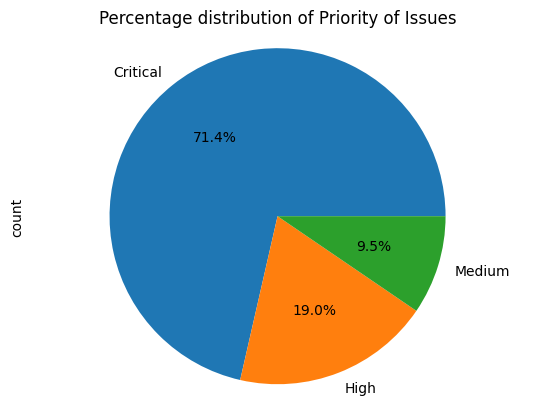

In [76]:
#Pie chart to display distribution of priorities in percentages
priority = final_data["Priority"].value_counts(dropna=False)
priority.plot.pie(autopct='%1.1f%%', labels=['Critical', 'High', 'Medium'])

plt.title('Percentage distribution of Priority of Issues')
plt.axis('equal')
plt.show()

- Most of the users who write for support have critical issues that need urgent attention.
- This means that users are able to resolve simpler issues on their own.

**Resolution ETA**

In [73]:
final_data["ETA"].value_counts()# complete the code with the column name for the column containing ticket resolution ETA.

ETA
12 Hours    8
8 Hours     4
6 Hours     3
2 Hours     3
1 hour      2
4 Hours     1
Name: count, dtype: int64

- Most of the issues have been predicted to take a long time to resolve due to the fact the the computer is off and it may require the technician to physically visit the customer or the customer to bring their device to the office.
- Critical and urgent issues have been prioritised and they should take a few hours to resolve.

Let's dive in a bit deeper here.

In [74]:
final_data.groupby(['Category', 'ETA']).support_tick_id.count() # complete the code to group by based on the categories and ETA.

Category      ETA     
Connectivity  2 Hours     2
              4 Hours     1
              6 Hours     1
              8 Hours     1
Data          1 hour      1
              12 Hours    6
Hardware      1 hour      1
              12 Hours    1
              2 Hours     1
              6 Hours     2
              8 Hours     2
Software      12 Hours    1
              8 Hours     1
Name: support_tick_id, dtype: int64

In [ ]:
# Create a stacked bar plot
final_data.groupby(['Category', 'ETA']).support_tick_id.count().unstack().plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel("Category")
plt.ylabel("Number of tickets")
plt.title("Number of tickets per category and ETA")
# Show the plot
plt.show()

## **Conclusion**
- We used an LLM to do multiple tasks, one stage at a time
    1. We first categorized the support tickets into major categories using the LLM
    2. We then identified key tags that were present in each support request and got the output in a structured format from the LLM for ease-of-access
    3. Next, we assigned priority using the LLM to each support ticket request as well as assigning a predicted time to resolution for the problems.
    4. Finally, in addition to all the above, we also got a response we can share with the customer based on their ticket and challenge.

## **Actionable Insight**

- In order to improve the model performance, one can try the following:
    1. Update the prompt
    2. Format the prompt properly using tabs and spaces
    3. Update the model parameters (`temparature`, `top_p`, `echo`, `seed`...)

- One can also manually label the data (overall sentiment and sentiments of different aspects) and then compare the model's output with the same to get a quantitative measure of the models performance.

## **Business Recommendations**

- In order to swiftly and effectively respond to customer input and to foster enhanced customer experiences, the business should:
    1. Respond prompty to highly prioritised customer challenges
    2. Highlight the very common challenges like hardware problems and establish the root cause to reduce the customer complaints
    3. Provide automated responces to basic and common challenges to ease the traffic to the customer support team.

  **Overally, the team should also reach out to select customers and get their feedback manually so as to evaluate the perfomance of the LLM model.**
